<a href="https://colab.research.google.com/github/Geon27/4-1-Boston_housin/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0(1208)_%EC%A0%95%EB%A6%AC_%2B_%EC%B5%9C%EC%A2%85_%2B_f1_score_%EC%84%A4%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston_housing Data를 활용한 집값 예측값 Model
각 모델(Logistic regression, KNeighbors, Decision tree, Random forest)의 f1-score 를 확인하고, 예측 정확도를 확인해본다.

- 나의 구글 드라이브와 구글 코랩의 연결  
- 이 과정(마운트)을 통해 나의 구글 드라이브내의 데이터를 구글 코랩에 로드하고 또한 분석된 내용을 저장하는것도 가능하게 됨

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive') 

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 파이썬 패키지 설치

패키지라 함은 메인엔진은 파이썬이 잘 구현될 수 있도록 지원해주는 체계로서 패키지안에 함수나 클래스 등이 포함되어 있음  
패키지를 사용하려면 2단계(인스톨-로드)를 거치는데 로드는 매번 인스톨은 처음에 1회만 하면 되는데 구글 코랩에서는 단점으로서 클라우드 방식이므로 인스톨을 매번해주어야 하는 번거로움이 있음

#### 패키지 로드

아래 코드는 인스톨 코드이므로 후에 로드를 다시 해주어야 함  
코랩에서는 다른 파이썬 IDE와 다르게 이미 필요한 패키지들이 설치되어 있어서 비교적 편리함  
다만 어떤 패키지는 버전에 따라 상황이 달라질 수 있으므로 같은 패키지여도 필요한 버전을 추가로 설치해야 하는 경우도 발생될 수 있음

In [ ]:
# !pip uninstall scipy -y
# !pip uninstall pingouin -y
!pip install pingouin
# !pip install statsmodels==0.13.1
!pip install sidetable
# !pip install researchpy 
# !pip install bioinfokit
# !pip install sidetable


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


패키지 인스톨 명령어 `"!pip install 패키지이름"`로 인스톨함

#### 패키지 로드

In [ ]:
import seaborn as sns
import pandas as pd
#import datatable as dt
import scipy.stats as ss
from sklearn import datasets
import numpy
import sidetable 
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.options.display.float_format = lambda x: f'{x:.3f}'
#pd.reset_option('display.float_format')

## 데이터로드

나의 구글 드라이브에서 원하는 데이터 파일을 찾아서(drive-My drive) 이에 대한 경로를 복사하여 아래 코드의 `' '`부분에 붙여 넣기  
아래의 경로는 이전 사용자의 고유경로이므로 바로 실행하면 에러가 발생될 수 있음

In [ ]:
##데이터 로드: 엑셀파일
# 파일명: 관광수요_데이터_예제_R업로드_환경부.xlsx
Df = pd.read_csv('/content/drive/MyDrive/보스턴_데이터과학/housing.csv')

In [ ]:
#Df[1:1] #변수명만 추출
print(Df.columns); print(len(Df.columns))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
14


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


데이터의 Type를 보게되면 전부 float(실수)형으로 되어있다.

In [ ]:
Df.shape

(506, 14)

In [ ]:
Df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


## feature와 target의 구분

In [ ]:
# 컬럼명 수동지정
features =['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
target = ['MEDV'] 

위 데이터셋에서는 python_score에 영향을 주는 요인들로 CRIM, AGE, RM, NOX, TAX등의 다양한 변수들이 있는 것을 알 수 있음. 영향을 주는 것을 독립변수(양적변수)라 하고 영향을 받는 것을 종속변수(질적변수)라고 하는데 현 데이터에서는 종속변수를 'MEDV', 나머지 변수들을 독립변수로 지정한다.

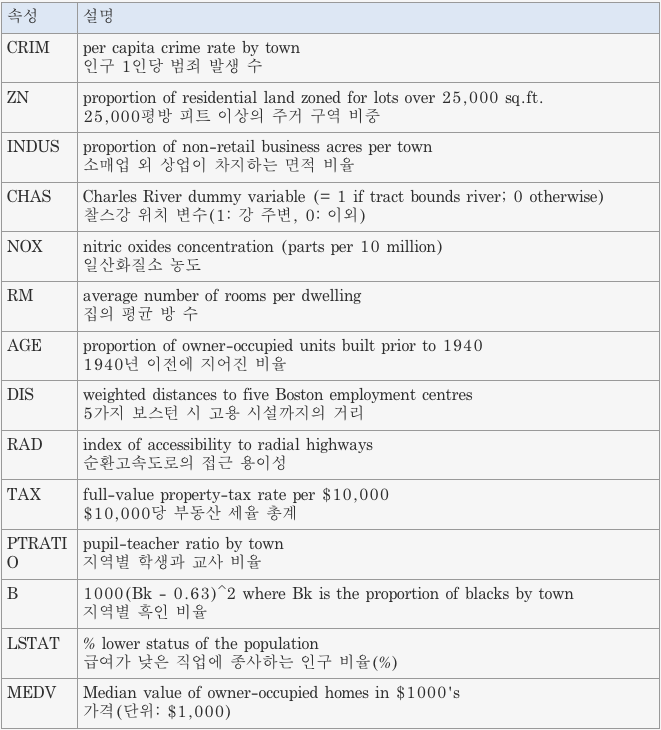

In [ ]:
# 데이터 로드 확인
print(Df.shape)            # 데이터의 가로세로수 확인
print(Df.head())           # 데이터 앞부분(5개)확인
print(Df.tail())           # 데이터 뒷부분(5개)확인

(506, 14)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700  
3 394.630  2.940 33.400  
4 396.900  5.330 36.200  
     CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
501 0.063 0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045 0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061 0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110 0.000 11.930 0.000 0.573 6.79

In [ ]:
Df_dt = pd.DataFrame(Df) # 데이터 한눈에 보기
Df_dt.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700


In [ ]:
Df['INDUS'].value_counts()

18.100    132
19.580     30
8.140      22
6.200      18
21.890     15
         ... 
1.210       1
1.380       1
3.750       1
0.460       1
2.310       1
Name: INDUS, Length: 76, dtype: int64

In [ ]:
# 문자형식으로 코딩된 질적변수를 더미변수로 코딩
Df_dummy = pd.get_dummies(Df, drop_first=True) # 기준변수를 0으로 만들어줌
Df_dummy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [ ]:
Df_dummy.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
Df_dummy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670,22.400
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080,20.600
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640,23.900
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480,22.000


In [ ]:
target_dummy = Df_dummy.drop(['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'], axis=1)

In [ ]:
target_dummy

,MEDV
0,24.000
1,21.600
2,34.700
3,33.400
4,36.200
...,...
501,22.400
502,20.600
503,23.900
504,22.000


In [ ]:
feature_dummy = Df_dummy.drop(['MEDV'], axis=1)

In [ ]:
feature_dummy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


### 양적변수 더미변수화

In [ ]:
# # var_nums  = Dataset[['egion_tourist_num','region_price_index','population','average_income','average_transport_cost']]
# #Ever_Married, Graduated, Profession, Spending_Score
# cat_vars = Df[features] # 'name',
# cat_vars
cat_vars = Df[features] # 'name',
cat_vars

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


변수들의 표준화

```
# 코드로 형식 지정됨
```



In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [ ]:
scaler_standard.fit(feature_dummy)
features_scaled=scaler_standard.transform(feature_dummy)
print(features_scaled.shape)
print(feature_dummy[:6])
features_scaled[:6]

(506, 13)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   
5 0.030  0.000  2.180 0.000 0.458 6.430 58.700 6.062 3.000 222.000   18.700   

        B  LSTAT  
0 396.900  4.980  
1 396.900  9.140  
2 392.830  4.030  
3 394.630  2.940  
4 396.900  5.330  
5 394.120  5.210  


array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148],
       [-0.41704368, -0.487722

분석하는 feature들의 단위가 서로 다를 수 있으므로 단위를 표준화할 필요가 있는데 이를 표준화라고 함. 한편 표준화 방법에는 여러가지 있음. 여기서는 `StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춥니다.`를 사용함

In [ ]:
feature_dummy = feature_dummy.astype(dtype='int32')

In [ ]:
target_dummy = target_dummy.astype(dtype='int32')

boston 데이터의 경우 모든 column가 float(실수) 타입으로 되어있다. float의 데이터 타입은 분석에 어려움이 발생하는데, 그러한 문제점을 해결하기 위해서는 모든 column을 int(정수)로 변환한다.

## 훈련/테스트 셋 분류

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(feature_dummy, target_dummy, random_state=42)#, test_size=0.2, stratify=y
# 중요한 것은 42를 사용할 때마다 처음 분할 할 때 항상 동일한 출력을 얻는다
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# test_size와 stratify는 필요한 옵션이지만 데이터가 적은 경우 에러가 발생될 수 있음

X_scaled과 y에 대해 train_test_split을 실행하면 총 4개의 데이터셋

(features_scaled_train, features_scaled_test, target_train, target_test)이 생성된다.

In [ ]:
print(features_scaled_train[:6])
print(target_train[:6])
#print(pd.concat(features_train[:6],target_train[:6]))

     CRIM  ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO    B  LSTAT
182     0   0      2     0    0   7   92    2    3  193       17  394      4
155     3   0     19     1    0   6   82    1    5  403       14   88     15
280     0  20      3     0    0   7   64    4    5  216       14  387      3
126     0   0     25     0    0   5   95    1    2  188       19  359     27
329     0   0      3     0    0   6   17    5    4  430       16  375      7
31      1   0      8     0    0   6  100    4    4  307       21  376     13
     MEDV
182    37
155    15
280    45
126    15
329    22
31     14


In [ ]:
print(features_scaled_test[:6])
print(target_test[:6])

     CRIM  ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO    B  LSTAT
173     0   0      4     0    0   6   84    2    5  296       16  395      9
274     0  40      6     1    0   6   32    4    4  254       17  396      3
491     0   0     27     0    0   5   98    1    4  711       20  390     18
72      0   0     10     0    0   6    7    5    4  305       19  390      5
452     5   0     18     0    0   6   91    2   24  666       20  385     17
76      0   0     12     0    0   6   74    4    5  398       18  373     11
     MEDV
173    23
274    32
491    13
72     22
452    16
76     20


In [ ]:
print(features_scaled_train.shape)
print(target_train.shape)

(379, 13)
(379, 1)


In [ ]:
print(features_scaled_test.shape)
print(target_test.shape)

(127, 13)
(127, 1)


In [ ]:
y_train = target_train.apply(lambda x : round(x)) 
y_test = target_test.apply(lambda x : round(x))   

y_train[(y_train>0) & (y_train<=10)] = 0     
y_train[(y_train>10) & (y_train<=20)] = 1
y_train[(y_train>20) & (y_train<=30)] = 2
y_train[(y_train>30) & (y_train<=40)] = 3
y_train[(y_train>40) & (y_train<=50)] = 4

y_test[(y_test>0) & (y_test<=10)] = 0         
y_test[(y_test>10) & (y_test<=20)] = 1
y_test[(y_test>20) & (y_test<=30)] = 2
y_test[(y_test>30) & (y_test<=40)] = 3
y_test[(y_test>40) & (y_test<=50)] = 4

classification을 진행할때는 label이 int(정수) 타입이 되어야하는데, boston 데이터의 경우 모든 columns가 float(실수) 타입으로 되어있다. 그대로 진행하게된다면, **Unknown label type: 'continuous'** 이라는 에러가 발생하고,
문제점을 해결하기 위해서는 모든 column을 int(정수)로 변환하면 되지만, 연속형 label이 너무 많아 정확한 예측이 어렵게된다. 따라서 예측값이 굉장히 낮게 나오는 문제가 발생한다. 이 문제를 해결하기 위해서는(모델의 예측성을 올리기 위해서는)Y축의 MEDV 값을 int형으로 변경한뒤, 다시 범주형으로 쪼개어 사용하여야 한다.

Ex) 0-10은 1, 10-20은 2, 20-30은 3 과 같이 바꾸어야 조금이라도 더 정확한 모델이 나오게 된다.

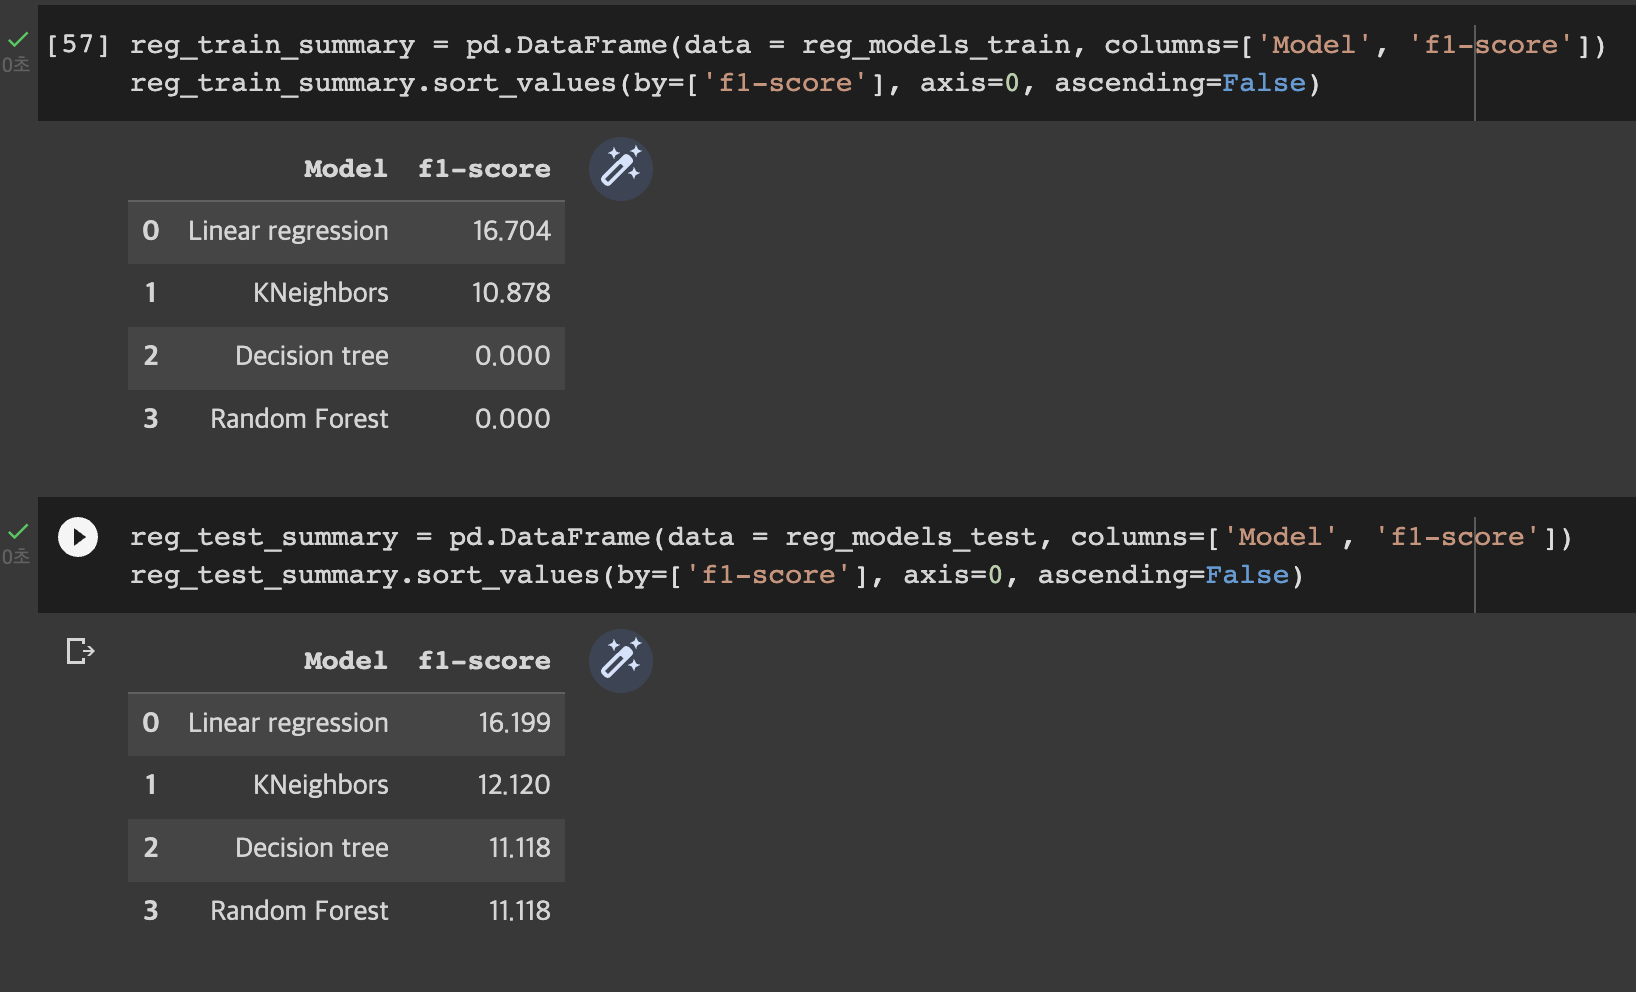

위의 경우가 모든 column을 int(정수)로 변환 후 바로 분석을 진행한 경우이며, 분석은 가능하지만 0~1 사이의 값이 도출되어야하는 f1-score값이 비 정상적으로 나오게 된다.

### 지도학습중 범주분류 예측

#### 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
LR_cate1 = LogisticRegression() # 기본치인 n_neighbors=5가 생략되어 있음

In [ ]:
LR_cate1.fit(features_scaled_train, y_train) # fit함수: 모델추정
LR_cate1.score(features_scaled_train, y_train) # 분류된 모델의 정확도를 측정

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6701846965699209

In [ ]:
LR_cate1.pred_test = LR_cate1.predict(features_scaled_test)

In [ ]:
# # f1_score는 이진분류와 다진분류 모두 사용가능, 빅데이터 분석기사 시험에서의 정확도 분류 기준
f1_LR_cate1_test = f1_score(y_test, LR_cate1.pred_test,average='macro')
print(f1_LR_cate1_test)

# # # 이진분류의 경우 빅데이터 분석기사 시험에서는 rou_auc를 더 많이 사용
# # from sklearn.metrics import roc_auc_score
# # roc_KN_cate1_test = roc_auc_score(Y_cate1_test, KN_cate1.pred_test)
# # print(roc_KN_cate1_test)

0.41054530130636324


In [ ]:
LR_cate1.pred_train = LR_cate1.predict(features_scaled_train)

In [ ]:
f1_LR_cate1_train = f1_score(y_train, LR_cate1.pred_train,average='macro')
print(f1_LR_cate1_train)

0.54278724954535


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # K-최근접 분류
KN_cate1 = KNeighborsClassifier() # 기본치인 n_neighbors=5가 생략되어 있음

In [ ]:
KN_cate1.fit(features_scaled_train, y_train) # fit함수: 모델추정
KN_cate1.score(features_scaled_train, y_train) # 분류된 모델의 정확도를 측정

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7018469656992085

In [ ]:
KN_cate1.pred_test = KN_cate1.predict(features_scaled_test)

In [ ]:
# f1_score는 이진분류와 다진분류 모두 사용가능, 빅데이터 분석기사 시험에서의 정확도 분류 기준
f1_KN_cate1_test = f1_score(y_test, KN_cate1.pred_test,average='macro')
print(f1_KN_cate1_test)

# # 이진분류의 경우 빅데이터 분석기사 시험에서는 rou_auc를 더 많이 사용
# from sklearn.metrics import roc_auc_score
# roc_KN_cate1_test = roc_auc_score(target_test, KN_cate1.pred_test)
# print(roc_KN_cate1_test)

0.46046832051934417


In [ ]:
KN_cate1.pred_train = KN_cate1.predict(features_scaled_train)

In [ ]:
f1_KN_cate1_train = f1_score(y_train, KN_cate1.pred_train,average='macro')
print(f1_KN_cate1_train)

0.6411934752271493


#### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_cate1 = DecisionTreeClassifier() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
DT_cate1.fit(features_scaled_train, y_train)

DecisionTreeClassifier()

In [ ]:
DT_cate1.pred_test = DT_cate1.predict(features_scaled_test)
#DT_cate1.pred_test
f1_DT_cate1_test=f1_score(y_test, DT_cate1.pred_test,average='macro')
print(f1_DT_cate1_test)

0.6559049999591209


In [ ]:
DT_cate1.pred_train = DT_cate1.predict(features_scaled_train)

f1_DT_cate1_train=f1_score(y_train, DT_cate1.pred_train,average='macro')
print(f1_DT_cate1_train)

1.0


In [ ]:
cate1_models_train = [('Logistic regression', f1_LR_cate1_train),
                      ('KNeighbors', f1_KN_cate1_train),
                      ('Decision tree', f1_DT_cate1_train)]
cate1_models_test = [('Logistic regression', f1_LR_cate1_test),
                     ('KNeighbors', f1_KN_cate1_test),
                     ('Decision tree', f1_DT_cate1_test)]

In [ ]:
cate1_train_summary = pd.DataFrame(data = cate1_models_train, columns=['Model', 'f1-score'])
cate1_train_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

,Model,f1-score
2,Decision tree,1.000
1,KNeighbors,0.641
0,Logistic regression,0.543


In [ ]:
cate1_test_summary = pd.DataFrame(data = cate1_models_test, columns=['Model', 'f1-score'])
cate1_test_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

,Model,f1-score
2,Decision tree,0.656
1,KNeighbors,0.460
0,Logistic regression,0.411


#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_cate1 = RandomForestClassifier() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
RF_cate1.fit(features_scaled_train, y_train)

<ipython-input-51-97f760dfe983>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_cate1.fit(features_scaled_train, y_train)


RandomForestClassifier()

In [ ]:
RF_cate1.pred_test = RF_cate1.predict(features_scaled_test)
#DT_cate1.pred_test
f1_RF_cate1_test=f1_score(y_test, RF_cate1.pred_test,average='macro')
print(f1_RF_cate1_test)

0.7294429576766776


In [ ]:
RF_cate1.pred_train = RF_cate1.predict(features_scaled_train)

f1_RF_cate1_train=f1_score(y_train, RF_cate1.pred_train,average='macro')
print(f1_RF_cate1_train)

1.0


#### 정확도 분석결과 summary

In [ ]:
cate1_models_train = [('Logistic regression', f1_LR_cate1_train),
                      ('KNeighbors', f1_KN_cate1_train),
                      ('Decision tree', f1_DT_cate1_train),
                      ('Random forest', f1_RF_cate1_train)]
cate1_models_test = [('Logistic regression', f1_LR_cate1_test),
                     ('KNeighbors', f1_KN_cate1_test),
                     ('Decision tree', f1_DT_cate1_test),
                     ('Random forest', f1_RF_cate1_test)]

In [ ]:
cate1_train_summary = pd.DataFrame(data = cate1_models_train, columns=['Model', 'f1-score'])
cate1_train_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

,Model,f1-score
2,Decision tree,1.000
3,Random forest,1.000
1,KNeighbors,0.641
0,Logistic regression,0.543


In [ ]:
cate1_test_summary = pd.DataFrame(data = cate1_models_test, columns=['Model', 'f1-score'])
cate1_test_summary.sort_values(by=['f1-score'], axis=0, ascending=False)

,Model,f1-score
3,Random forest,0.729
2,Decision tree,0.656
1,KNeighbors,0.460
0,Logistic regression,0.411


f1-score의 결과값으로는, Random forest가 약 76%, Decision tree가 약 70%, KNeighbors가 약 46%, Logistic regression이 약 41%의 예측 정확성을 보이고 있다.

### F1-Score란?

**참고 사이트**

데이터 타입의 변환 :  https://kin.naver.com/qna/detail.nhn?d1id=1&dirId=10402&docId=379921126&qb=dGVzdDI=&enc=utf8&section=kin.qna&rank=628&search_sort=0&spq=0

https://seong6496.tistory.com/134